<a href="https://colab.research.google.com/github/Dhanasekaran-MS/Face-Mask-Detection-using-CNN/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [15]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [17]:
from zipfile import ZipFile
file = '/content/face-mask-dataset.zip'
with ZipFile(file,'r') as zip:
    zip.extractall()
    print('Data Extracted')


Data Extracted


In [18]:
mask = os.listdir('/content/data/with_mask')
without_mask = os.listdir('/content/data/without_mask')

In [19]:
mask[:5]

['with_mask_1981.jpg',
 'with_mask_2613.jpg',
 'with_mask_2316.jpg',
 'with_mask_916.jpg',
 'with_mask_2429.jpg']

In [20]:
without_mask[:5]

['without_mask_3603.jpg',
 'without_mask_519.jpg',
 'without_mask_317.jpg',
 'without_mask_1204.jpg',
 'without_mask_856.jpg']

In [21]:
print('Number of Images with Mask :',len(mask))

Number of Images with Mask : 3725


In [22]:
print('Number of Images without Mask :',len(without_mask))

Number of Images without Mask : 3828


Creating Labels

In [23]:
# With Mask --> 1
# Without Mask --> 0

In [24]:
with_mask_labels = [1]*len(mask)
without_mask_labels = [0]*len(without_mask)

In [25]:
with_mask_labels[:5]

[1, 1, 1, 1, 1]

In [26]:
without_mask_labels[:5]

[0, 0, 0, 0, 0]

In [27]:
labels = with_mask_labels + without_mask_labels

In [28]:
labels[:5]

[1, 1, 1, 1, 1]

In [29]:
labels[-5:]

[0, 0, 0, 0, 0]

Display img


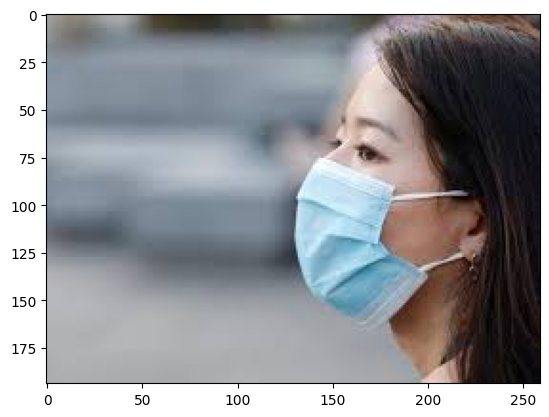

In [30]:
img = mpimg.imread('/content/data/with_mask/with_mask_2500.jpg')
imgplot = plt.imshow(img)
plt.show()

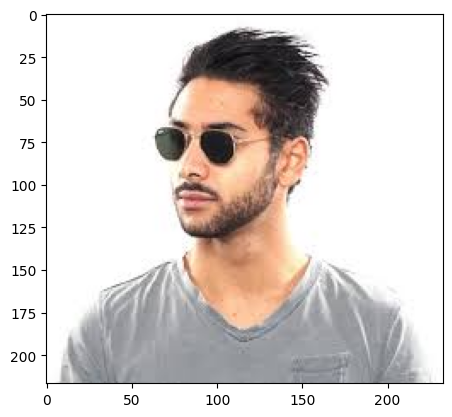

In [31]:
img = mpimg.imread('/content/data/without_mask/without_mask_2500.jpg')
imgplot = plt.imshow(img)
plt.show()

IMAGE PROCESSING
1. resize
2. Np array


In [32]:
mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

In [33]:
data=[]

for img in mask:
    image = Image.open(mask_path + img)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [34]:
for img in without_mask:
    image = Image.open(without_mask_path + img)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [35]:
len(data)

7553

array([[[144, 124,  98],
        [153, 134, 110],
        [167, 150, 126],
        ...,
        [245,  61,  97],
        [245,  63,  97],
        [243,  62,  95]],

       [[125, 107,  83],
        [131, 113,  90],
        [142, 125, 102],
        ...,
        [243,  62,  97],
        [242,  63,  96],
        [241,  62,  94]],

       [[154, 137, 116],
        [156, 139, 118],
        [157, 141, 121],
        ...,
        [238,  62,  95],
        [235,  61,  93],
        [233,  61,  91]],

       ...,

       [[253, 246, 226],
        [251, 241, 222],
        [248, 235, 216],
        ...,
        [113,  32,  41],
        [120,  35,  44],
        [121,  36,  44]],

       [[251, 240, 218],
        [250, 236, 216],
        [247, 230, 209],
        ...,
        [127,  35,  46],
        [134,  39,  50],
        [137,  40,  51]],

       [[249, 234, 214],
        [248, 232, 210],
        [245, 226, 204],
        ...,
        [135,  39,  50],
        [143,  42,  54],
        [145,  43,  54]]], dtype=uint8)
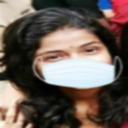

In [36]:
data[0]

In [37]:
X = np.array(data)
y = np.array(labels)

In [38]:
X.shape

(7553, 128, 128, 3)

In [39]:
y.shape

(7553,)

**Train Test Split**

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [41]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

**Building a Convolutional Neural Network**

In [42]:
import tensorflow as tf
from tensorflow import keras

In [43]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# compile

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [45]:
# Training the Neural Network

history = model.fit(x_train_scaled, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - acc: 0.6597 - loss: 0.6378 - val_acc: 0.8860 - val_loss: 0.2749
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8775 - loss: 0.3064 - val_acc: 0.8992 - val_loss: 0.2354
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9035 - loss: 0.2594 - val_acc: 0.9174 - val_loss: 0.2026
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9176 - loss: 0.2118 - val_acc: 0.9223 - val_loss: 0.2006
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.9267 - loss: 0.1790 - val_acc: 0.9256 - val_loss: 0.1753


In [46]:
loss, acc = model.evaluate(x_test_scaled, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9101 - loss: 0.2144


In [47]:
print('Test Accuracy = ', acc)

Test Accuracy =  0.9126406311988831


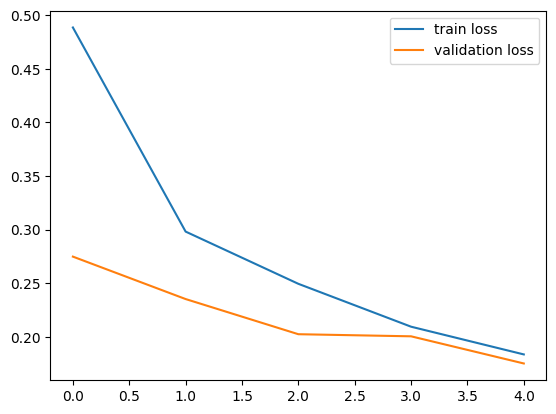

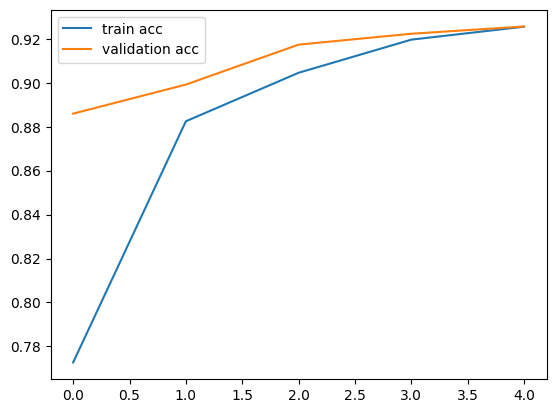

In [48]:
h = history

# Loss
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(h.history['acc'], label='train acc')
plt.plot(h.history['val_acc'], label='validation acc')
plt.legend()
plt.show()

Path of image to be Predicted/content/masked.jpg


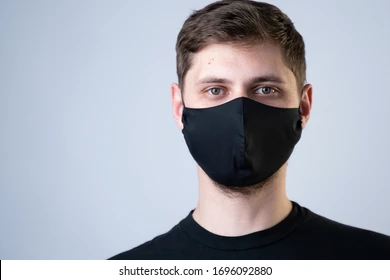

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction :  [[0.07328661 0.9267134 ]]
Mask is there


In [50]:
# predictive system
input_image = input('Path of image to be Predicted')
input_image = cv2.imread(input_image)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, (1,128,128,3))

input_prediction = model.predict(image_reshaped)
print('Prediction : ',input_prediction)

output = np.argmax(input_prediction)
if output == 0:
    print('Mask is not there')
else:
    print('Mask is there')

Path of image to be Predicted/content/unmasked2.jpeg


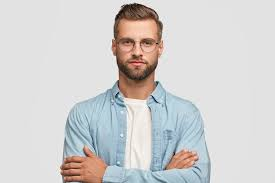

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction :  [[0.53877515 0.4612249 ]]
Mask is not there


In [54]:
# predictive system
input_image = input('Path of image to be Predicted')
input_image = cv2.imread(input_image)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, (1,128,128,3))

input_prediction = model.predict(image_reshaped)
print('Prediction : ',input_prediction)

output = np.argmax(input_prediction)
if output == 0:
    print('Mask is not there')
else:
    print('Mask is there')